In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

In [2]:
def DADOS(url:str):
    df = pd.read_csv(url,sep = ';')
    df = df.drop(['VCasa',"ECasa","DCasa","GPCasa","GCCasa",
                  "PtCasa","VFora","EFora","DFora","GPFora",
                  "GCFora","PtFora"],axis=1)
    df.iloc[:,4:37]=df.iloc[:,4:37]/38
    df.iloc[:,2]=df.iloc[:,2]/10
    return df

In [3]:
df19 = DADOS('.\Dados\dados2019.csv')

In [4]:
scaler = MaxAbsScaler().fit(df19.iloc[:,1:37])

In [5]:
a = scaler.transform(df19.iloc[:,1:37])

In [6]:
df191 = df19
df191.iloc[:,1:37]=a

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=19)
model.fit(a,df19.Pt)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=19, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

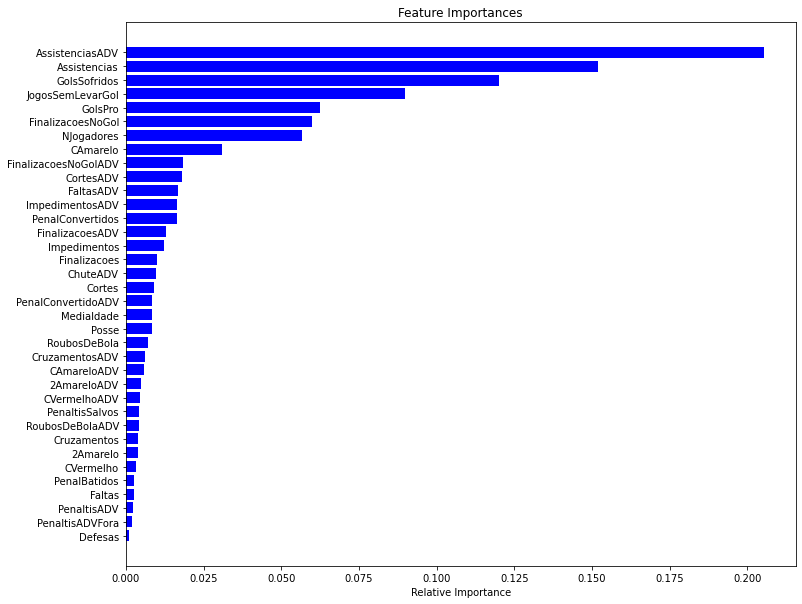

In [8]:
features = df19.columns[1:37]
importances = model.feature_importances_
indices = np.argsort(importances) #[0:9])  # top 10 features
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.xmin = [0.01]
plt.show()

In [11]:
from sklearn.feature_selection import SelectFromModel
new_model = SelectFromModel(model,threshold=0.005)
fit = new_model.fit_transform(a, df19.Pt)
new_model.get_support()
selected_columns = np.array(df19.columns[1:37])[new_model.get_support()]
df3 = df191[selected_columns]
pd.options.mode.chained_assignment = None
df3['Pt'] = df19['Pt']
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NJogadores            20 non-null     float64
 1   MediaIdade            20 non-null     float64
 2   Posse                 20 non-null     float64
 3   GolsPro               20 non-null     float64
 4   Assistencias          20 non-null     float64
 5   PenalConvertidos      20 non-null     float64
 6   CAmarelo              20 non-null     float64
 7   GolsSofridos          20 non-null     float64
 8   AssistenciasADV       20 non-null     float64
 9   PenalConvertidoADV    20 non-null     float64
 10  CAmareloADV           20 non-null     float64
 11  ChuteADV              20 non-null     float64
 12  JogosSemLevarGol      20 non-null     float64
 13  Finalizacoes          20 non-null     float64
 14  FinalizacoesNoGol     20 non-null     float64
 15  FinalizacoesADV       20 

In [12]:
df3

,NJogadores,MediaIdade,Posse,GolsPro,Assistencias,PenalConvertidos,CAmarelo,GolsSofridos,AssistenciasADV,PenalConvertidoADV,...,FinalizacoesADV,FinalizacoesNoGolADV,Impedimentos,Cortes,RoubosDeBola,FaltasADV,ImpedimentosADV,CruzamentosADV,CortesADV,Pt
0,0.729167,0.921233,0.820000,0.677419,0.769231,0.333333,0.581197,0.603774,0.621622,0.428571,...,0.653846,0.634409,0.942857,0.928315,0.858333,0.888591,0.922222,0.765060,1.000000,61
1,0.583333,0.900685,0.813333,0.693548,0.717949,0.333333,0.769231,0.528302,0.432432,0.285714,...,0.741987,0.698925,0.871429,0.718638,0.920833,0.852349,0.555556,0.771084,0.830266,62
2,0.562500,0.910959,0.821667,0.596774,0.564103,0.666667,0.726496,0.698113,0.756757,0.428571,...,0.756410,0.704301,0.757143,0.709677,0.866667,0.832215,0.377778,0.762651,0.811861,50
3,0.666667,0.938356,1.000000,1.000000,1.000000,0.833333,0.675214,0.509434,0.405405,0.142857,...,0.616987,0.623656,0.628571,0.646953,0.856250,0.738255,0.900000,0.701205,0.920245,75
4,0.687500,1.000000,0.751667,0.467742,0.435897,0.333333,0.914530,0.849057,0.864865,0.428571,...,0.844551,0.865591,0.785714,0.887097,0.841667,0.888591,0.700000,0.936145,0.865031,44
5,0.812500,0.931507,0.760000,0.709677,0.794872,0.333333,0.760684,0.811321,0.756757,0.428571,...,1.000000,0.956989,0.985714,0.632616,0.797917,0.813423,0.555556,1.000000,0.732106,55
6,0.833333,0.890411,0.828333,0.741935,0.948718,0.500000,0.897436,0.641509,0.594595,0.142857,...,0.863782,0.666667,0.857143,0.623656,0.883333,0.758389,0.522222,0.959036,0.858896,66
7,0.687500,0.955479,0.888333,0.467742,0.512821,0.500000,0.931624,0.679245,0.675676,0.428571,...,0.732372,0.672043,0.728571,0.731183,0.766667,0.832215,0.644444,0.804819,0.840491,39
8,0.812500,0.969178,0.806667,0.629032,0.641026,0.833333,0.717949,0.754717,0.702703,0.142857,...,0.737179,0.677419,1.000000,0.634409,0.841667,0.727517,0.600000,0.837349,0.807771,52
9,0.916667,0.938356,0.848333,0.500000,0.564103,0.166667,0.735043,0.603774,0.621622,0.714286,...,0.762821,0.693548,0.700000,0.675627,0.768750,0.951678,0.533333,0.768675,0.777096,41


In [26]:
#Dados e Target
X = df3.values[:,0:24]
Y = df3.values[:,24]

In [37]:
#Separando conjunto de treino e teste
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, validation_curve
validation_size = 0.20
seed = 0
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
num_folds = 5
score = 'r2'

print(Y_validation)

[39. 62. 45. 52.]


In [38]:
#importando modelos
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('EN', ElasticNet(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('SVR', SVR()))
models.append(('RIDGE', Ridge(random_state=seed)))
models.append(('RIDGECV', RidgeCV()))
models.append(('MLPR', MLPRegressor(random_state=seed)))
models.append(('GPR', GaussianProcessRegressor(random_state=seed)))

In [40]:
#Testando diferentes modelos no DF PADRONIZADO
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is Fal

LR: 0.512455 (0.528305)
LASSO: 0.279983 (0.451878)
EN: -0.136922 (0.353810)
KNN: 0.397125 (0.193317)
CART: -3.767811 (3.555549)
SVR: -0.122077 (0.271119)
RIDGE: 0.399302 (0.246548)
RIDGECV: 0.649751 (0.138051)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPR: -0.369298 (0.379078)
GPR: 0.244619 (0.521799)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
